<a href="https://colab.research.google.com/github/cbernet/introduction_machine_learning/blob/master/notebooks/python_crash_course/02_numpy_for_machine_learning_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Ouvrir dans Colab"/></a>


Les utilisateurs purs et durs de C++ ou de Fortran parmi les physiciens disent souvent que python est trop lent.

Certes, python est un langage interprété et il est lent.

Même les défenseurs de python comme moi le réalisent, mais nous pensons que la (manque de) vitesse de python n&#39;est pas vraiment un problème, par exemple parce que :

* Le temps de calcul est compensé par un temps de développement beaucoup plus réduit ;
* Le profilage est facile, ce qui signifie que l&#39;on peut trouver les parties du code qui sont lentes, les optimiser, et même les écrire dans des langages plus rapides afin qu&#39;ils puissent être compilés et utilisés à partir de python ;

Et, surtout:

* Certains outils python comme numpy sont aussi rapides que le simple C.

Dans ce didacticiel, vous comprendrez ce qu&#39;est numpy et pourquoi c&#39;est rapide, et apprendrez exactement ce qu&#39;il faut à propos de numpy pour les opérations d&#39;apprentissage automatique habituelles.

À la fin, vous travaillerez sur des opérations numpy pratiques et réelles, généralement rencontrées dans les projets d&#39;apprentissage automatique.


## Installation

Numpy est le cœur du python scientifique, il est donc installé en tant que dépendance pour la plupart des packages python scientifiques. Par exemple, vous l&#39;obtiendrez si vous installez scikit-learn, matplotlib ou Keras. De plus, numpy est installé par défaut sur les plates-formes habituelles en tant que service pour les notebooks jupyter, tels que Google Colab ou FloydHub.

Si vous ne l&#39;avez pas, vous pouvez l&#39;installer avec [Anaconda](https://thedatafrog.com/en/install-anaconda-data-science-python/), en faisant :

```
conda installer numpy
```

Ensuite, traditionnellement, numpy est importé de la manière suivante :


In [85]:
import numpy as np

Veuillez continuer à importer en tant que `np`, cela rendra votre code plus clair pour vous et les autres personnes.


## Le tableau numpy : Pourquoi est-il rapide ?

L&#39;objectif principal de numpy est de fournir une structure de données très efficace appelée tableau numpy, et les outils pour manipuler de tels tableaux.

Pourquoi le tableau numpy est-il si rapide ?

Car, sous le capot, les tableaux sont traités avec du code compilé, optimisé pour le CPU. En particulier, les opérations numpy sont parallèles car elles utilisent [SIMD](https://en.wikipedia.org/wiki/SIMD) (Single Operation Multiple Data).

Pour voir à quelle vitesse numpy est rapide, nous pouvons le chronométrer.

Créons une grande liste avec un million d&#39;entiers et un tableau numpy à partir de cette liste :


In [86]:
lst = range(1000000)
arr = np.array(lst)
arr

array([     0,      1,      2, ..., 999997, 999998, 999999])

Calculons maintenant le carré de tous les entiers et voyons combien de temps cela prend.


On commence par la liste :


In [87]:
%timeit squares = [x**2 for x in lst]

1 loop, best of 3: 307 ms per loop


Et on fait de même pour le tableau :


In [88]:
%timeit squares = arr**2

100 loops, best of 3: 2.87 ms per loop


Comme vous pouvez le voir, c&#39;est plus de 300 fois plus rapide.

On peut en principe boucler sur le tableau numpy comme ceci :


In [89]:
%timeit squares = [x**2 for x in arr]

1 loop, best of 3: 330 ms per loop


Mais alors, on perd complètement les bienfaits du numpy ! En effet, lorsque nous faisons `arr**2` nous utilisons la fonction carrée de numpy, qui est intrinsèquement parallèle. Quand on boucle, on traite les éléments un par un avec du python basique. Donc:

**Ne jamais boucler sur un tableau numpy ! Vous serez tenté de le faire, mais il ne devrait pas y avoir d&#39;exception !**


## Types de données du tableau Numpy

Nous avons vu que les tableaux numpy sont traités par du code compilé avec SIMD.

Pour que cela fonctionne, les éléments d&#39;un tableau numpy doivent être :

* d&#39;un type basique, par exemple entiers ou flottants. La gamme complète des possibilités est donnée sur [cette page](https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html);
* du même type, de sorte qu&#39;ils aient la même taille, par exemple des flottants de 64 bits, ou des entiers de 16 bits.

Au contraire, les listes python peuvent contenir des objets hétérogènes de tout type.

Voici quelques façons de créer des tableaux numpy avec différents types :


In [90]:
from sys import getsizeof as sizeof

# numpy guesses that it should use integers
x = np.array([0, 1, 2])
print(x.dtype)
# or floats: 
x = np.array([0., 1., 2.])
print(x.dtype)
# here we specify a python compatible type,
# interpreted by numpy as int64
x = np.array([0., 1., 2.], dtype=int)
print(x.dtype)
# here we specify that we want 8 bits integers
x = np.array([0, 1, 2], dtype=np.int8)
print(x.dtype)

int64
float64
int64
int8


Cela permet d&#39;estimer facilement la taille d&#39;un tableau numpy en mémoire, pour voir si vous allez faire exploser votre ordinateur avant de le faire réellement.

---

*Exercer*

Par exemple, considérons un échantillon de 1000 images, chacune avec 200x200 pixels, et 3 canaux de couleur par pixel.
L&#39;indice de couleur va de 0 à 255, et peut donc être codé sous forme d&#39;entier de 8 bits.

En supposant que vous stockiez les données de toutes les images dans un seul tableau numpy, quelle serait sa taille en mémoire en Go ?

---


**réponse** : 0,1 Go


In [91]:
nbits = 1000 * 200**2 * 3 * 8
gbytes = nbits / 1024**3 / 8 
print(gbytes)

0.11175870895385742


## Opérations par élément Numpy

J&#39;appelle opérations par élément toutes les opérations qui affectent les éléments du tableau, mais préservent la forme du tableau.

Tous les opérateurs habituels sont implémentés dans numpy, pour les tableaux. Par example:


In [92]:
x = np.array(range(5))
x**2

array([ 0,  1,  4,  9, 16])

Notez que ces opérateurs, dans numpy, sont par élément :


In [93]:
x+1

array([1, 2, 3, 4, 5])

Les équivalents au niveau des éléments des fonctions du package python `math` sont disponibles directement à partir du package `numpy`, du même nom, par exemple :


In [94]:
np.exp(x)

array([ 1.        ,  2.71828183,  7.3890561 , 20.08553692, 54.59815003])

Enfin, des opérateurs binaires sont disponibles :


In [95]:
x = np.array([0, 1, 2])
y = np.array([1, 2, 3])
x+y

array([1, 3, 5])

In [96]:
x*y

array([0, 2, 6])

## Forme de tableau Numpy

Jusqu&#39;à présent, nous n&#39;avons vu que des tableaux à une seule dimension. Mais souvent, plus de dimensions sont utilisées.

Les tableaux multidimensionnels peuvent être créés à partir d&#39;une liste de listes, par exemple :


In [97]:
x = np.array([[0, 1], [2, 3], [4,5]])
x

array([[0, 1],
       [2, 3],
       [4, 5]])

L&#39;attribut shape nous donne la longueur de chaque dimension :


In [98]:
x.shape

(3, 2)

Dans ce cas, nous avons 3 rangées de 2 nombres. La première dimension est la dimension la plus externe et la seconde la dimension la plus interne.

Prenons l&#39;exemple d&#39;une image de 2x2 pixels, avec 3 canaux de couleurs (rouge, bleu, vert) dans chaque pixel :


In [99]:
x = np.array(
    [
        [ [1,2,3], [4,5,6], ],
        [ [7,8,9], [10,11,12]]
    ]
)
print(x)
print(x.shape)

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
(2, 2, 3)


Pour visualiser plus facilement les tableaux numpy, je pense souvent à la dimension la plus interne séparément. Par exemple, ici, nous avons un tableau de 2x2 pixels, avec un sous-tableau de taille 3 dans chaque pixel.

Et comme dernier exemple, considérons un &quot;vecteur de colonne&quot;:


In [100]:
x = np.array([
    [0],
    [1],
    [2], 
    [3]
])
print(x)
print(x.shape)

[[0]
 [1]
 [2]
 [3]]
(4, 1)


Comme vous pouvez le voir, le &quot;vecteur de colonne&quot; a deux dimensions, ce qui peut être contre-intuitif. Il y a un seul nombre (un scalaire) sur la dimension la plus intérieure.



Veuillez noter que dans numpy, une dimension peut également être appelée un &quot;axe&quot;.

Très souvent, les tableaux numpy d&#39;une forme donnée sont construits en initialisant tous les éléments à un nombre fixe ou à un nombre aléatoire. Par example:


In [101]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [102]:
np.ones(3)

array([1., 1., 1.])

In [103]:
np.ones_like(x)

array([[1],
       [1],
       [1],
       [1]])

In [104]:
np.random.rand(2,2)

array([[0.83656477, 0.01235059],
       [0.64045123, 0.09117495]])

De nombreux autres [outils d&#39;échantillonnage aléatoire] (https://docs.scipy.org/doc/numpy-1.16.0/reference/routines.random.html) sont disponibles.


## Indexation des tableaux Numpy


### Indexation de base


Voici un tableau 1D :


In [105]:
x = np.arange(10) + 1
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Les éléments sont accessibles directement, en utilisant leur index dans le tableau (l&#39;index commence à 0) :


In [106]:
x[1]

2

Et, comme d&#39;habitude dans les séquences python, les tableaux négatifs commencent à la fin :


In [107]:
x[-2]

9

Le tableau peut être modifié en place :


In [108]:
print(id(x))
x[1] = 0
print(id(x))
print(x)

140100337914304
140100337914304
[ 1  0  3  4  5  6  7  8  9 10]


Pour les tableaux multidimensionnels, l&#39;indexation de base est effectuée en spécifiant une liste d&#39;indices séparés par des virgules :


In [109]:
x = np.zeros((2,3))
x[0,1] = 1
x

array([[0., 1., 0.],
       [0., 0., 0.]])

### Sélection avec indexation booléenne

L&#39;indexation peut être utilisée pour sélectionner des éléments de tableau en fonction d&#39;un masque.

Créons à nouveau notre tableau 1D :


In [110]:
x = np.arange(10) + 1
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Pour créer un masque, nous évaluons une expression booléenne pour chaque élément du tableau. Par exemple, pour trouver tous les nombres pairs :


In [111]:
x%2 == 0

array([False,  True, False,  True, False,  True, False,  True, False,
        True])

Que signifie cette expression ?

Puisque `x` est un tableau numpy, `x%2` est une opération numpy élément par élément qui évalue `%2` sur tous les éléments du tableau et renvoie un nouveau tableau avec les résultats :


In [112]:
xmod = x%2
xmod

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

Ensuite, nous sélectionnons les nombres pairs en demandant que le modulo soit égal à zéro. Encore une fois, l&#39;opérateur `==` est appliqué à un tableau numpy, il s&#39;agit donc d&#39;une opération par élément :


In [113]:
mask = (xmod == 0)
mask

array([False,  True, False,  True, False,  True, False,  True, False,
        True])

Avec ce masque, nous sélectionnons des nombres pairs et renvoyons un nouveau tableau :


In [114]:
x[mask]

array([ 2,  4,  6,  8, 10])

En fait, le nouveau tableau est une vue sur le tableau d&#39;origine. **Les données ne sont pas copiées.**

Il est possible d&#39;inverser le masque :


In [115]:
x[~mask]

array([1, 3, 5, 7, 9])

Et bien sûr il est possible de fabriquer des masques à la volée, ce qui est généralement fait :


In [116]:
x[x%2==0]

array([ 2,  4,  6,  8, 10])

**Dans la science des données python, l&#39;indexation booléenne est largement utilisée pour sélectionner des données en appliquant des seuils sur les variables choisies.**


### Trancher


En python de base, une tranche est définie comme un tuple, &quot;start, stop, step&quot;. Il permet de sélectionner une séquence d&#39;éléments dans une séquence (qui, par essence en python, est 1D) :


In [117]:
lst = list(range(1, 10))
print(lst)
lst[1::2]

[1, 2, 3, 4, 5, 6, 7, 8, 9]


[2, 4, 6, 8]

Nous avons sélectionné des éléments :

* à partir de l&#39;indice 1 (valeur 2);
* s&#39;arrêter après la fin de la liste, car `stop` n&#39;est pas spécifié. A ce stade, le dernier élément, 9, est inclus ;
* par pas de 2. Donc 9 n&#39;apparaît pas.


---

*Exercer:*

Jouez avec la définition de tranche dans la cellule ci-dessus. Essayez de:

* sélectionnez tous les nombres impairs avec une tranche
* sélectionnez tous les nombres supérieurs ou égaux à 5
* sélectionner tous les nombres pairs entre 2 et 6

---


**Réponses**:


In [120]:
lst[::2]

[1, 3, 5, 7, 9]

In [122]:
lst[4:]

[5, 6, 7, 8, 9]

In [123]:
lst[1:6:2]

[2, 4, 6]

Dans l&#39;exemple ci-dessus, nous avons décidé de ne pas spécifier stop. Ceci est possible pour tous les domaines :


In [ ]:
print( lst[:5:] )
print( lst[::2] )
print( lst[3::] )
print( lst[::] )

[1, 2, 3, 4, 5]
[1, 3, 5, 7, 9]
[4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


La notation de ceux-ci peut et doit être simplifiée en :


In [ ]:
print( lst[:5] )
print( lst[::2] )
print( lst[3:] )
print( lst[:] )

[1, 2, 3, 4, 5]
[1, 3, 5, 7, 9]
[4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


---

*Exercer:*

Pourriez-vous simplifier davantage ces expressions en supprimant plus de deux-points ? Que se passerait-il si vous le faisiez ? Testez vos hypothèses dans la cellule ci-dessus.

---


**Répondre:**

Pas moyen de simplifier davantage. Par exemple, si nous supprimons les deux points à `lst[:5]`, cela devient `lst[5]`, ce n&#39;est donc pas du tout la même chose. La première notation renvoie les 5 premiers éléments, tandis que la seconde renvoie le sixième élément :


In [124]:
lst[5]

6

Numpy slicing est une simple généralisation du python slicing à plusieurs dimensions. Pour le tester, nous créons une matrice 2D avec 4 lignes et 5 colonnes. Pour cela, nous utilisons la méthode de remodelage qui sera discutée dans la section suivante :


In [125]:
x = np.arange(20).reshape(4,5)
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

Nous pouvons maintenant utiliser la notation slice sur n&#39;importe quel champ de l&#39;index multidimensionnel. Voici quelques exemples :

* sélectionnez la deuxième colonne :


In [126]:
x[:, 1]

array([ 1,  6, 11, 16])

* sélectionnez les deux premières colonnes :


In [127]:
x[:, :2]

array([[ 0,  1],
       [ 5,  6],
       [10, 11],
       [15, 16]])

* sélectionnez les colonnes par étapes de 2 :


In [128]:
x[:, ::2]

array([[ 0,  2,  4],
       [ 5,  7,  9],
       [10, 12, 14],
       [15, 17, 19]])

* ordre inverse des colonnes, en spécifiant un pas de -1 sur la dernière dimension :


In [129]:
x[:, ::-1]

array([[ 4,  3,  2,  1,  0],
       [ 9,  8,  7,  6,  5],
       [14, 13, 12, 11, 10],
       [19, 18, 17, 16, 15]])

Dans les exemples précédents, nous avons travaillé sur la dernière dimension, tout en préservant la première dimension. Pour cela, nous devions ajouter un `:` comme premier élément d&#39;indexation pour demander une boucle sur la première dimension.

Mais cela peut devenir douloureux lorsqu&#39;il y a plus de 2 dimensions. Par exemple, considérons ce tableau 3D :


In [130]:
y = np.arange(8).reshape((2,2,2))
y

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

C&#39;est un cube 2x2x2. Si vous souhaitez sélectionner les premiers éléments le long de la dernière dimension, vous pouvez soit :


In [131]:
y[:,:,0]

array([[0, 2],
       [4, 6]])

Ou utilisez la notation **ellipse** :


In [132]:
y[...,0]

array([[0, 2],
       [4, 6]])

Les points de suspension ajoutent autant de `:` que de dimensions manquantes dans l&#39;instruction d&#39;indexation. De cette façon, vous n&#39;avez pas besoin de garder une trace du nombre de dimensions et vous tapez moins. Mais surtout, votre code devient indépendant du nombre de dimensions du tableau. Par exemple dans ce cas, `y[...,0]` sélectionne les premiers éléments le long de la dernière dimension quelle que soit la dimension de y :


In [133]:
y = np.arange(8).reshape(2,4)
print(y)
print(y[...,0])

[[0 1 2 3]
 [4 5 6 7]]
[0 4]


## Remodelage du tableau Numpy

Le remodelage d&#39;un tableau consiste à réorganiser les données du tableau en un nouveau tableau de forme différente.

Tout d&#39;abord, le remodelage permet de créer facilement un tableau avec une forme donnée, comme nous l&#39;avons fait précédemment :


In [134]:
x = np.arange(20).reshape(4,5)
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

Nous avons créé un tableau 1D plat avec des nombres entiers allant de 0 à 19, et l&#39;avons immédiatement remodelé en un tableau 2D de forme &quot;(4,5)&quot;.

### Rendre un tableau unidimensionnel

Souvent, il faut aplatir un tableau. Cela peut se faire de plusieurs manières :

* aplatir :


In [135]:
y = x.flatten()
y

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

* défiler :


In [136]:
x.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

* remodeler :


In [137]:
x.reshape(-1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

Le résultat est le même, alors quelle est la différence entre aplatir, s&#39;effilocher et remodeler ?

Tout d&#39;abord, flatten renvoie toujours une copie du tableau.

D&#39;un autre côté, ravel tente de renvoyer une vue sur le tableau d&#39;origine et ne copie les données que lorsque cela est nécessaire.
Cela signifie que si vous modifiez la sortie de ravel, vous pouvez modifier le tableau d&#39;origine. En outre, cela signifie que vous devez utiliser ravel sur de très gros tableaux pour économiser de la mémoire, et que ravel sera généralement plus rapide que flatten.

remodeler est une fonction plus flexible car vous pouvez remodeler n&#39;importe quoi. Tout comme ravel, il renvoie une vue et n&#39;effectue une copie que lorsque cela est nécessaire. Je suggère d&#39;utiliser flatten ou ravel lorsque vous souhaitez aplatir un tableau, pour rendre votre code plus explicite.


### Transformer un tableau 1D en un tableau 1D &quot;colonne&quot;

Cela signifie que nous voulons transformer un tableau de forme &#39;(N,)&#39; en un tableau de forme &#39;(N,1)&#39;. Considérons un tableau de forme `(5,)` :


In [138]:
y = np.arange(5)
print(y)
print(y.shape)

[0 1 2 3 4]
(5,)


Nous le transformons en un tableau de forme en colonnes (20,1) avec l&#39;attribut `c_` (notez que ce n&#39;est pas une fonction !)


In [139]:
coly = np.c_[y]
print(coly)
print(coly.shape)

[[0]
 [1]
 [2]
 [3]
 [4]]
(5, 1)


## Exemples pratiques de numpy en apprentissage automatique

Vous devez en savoir suffisamment sur numpy pour gérer la plupart des opérations numpy rencontrées dans les projets d&#39;apprentissage automatique.

Nous allons maintenant travailler sur des exemples réels afin que vous puissiez perfectionner vos compétences en numpy !


### Gestion des étiquettes

Prenons un exemple pratique d&#39;apprentissage automatique supervisé, la classification d&#39;images de chiens et de chats.
La machine est présentée avec des exemples afin qu&#39;elle puisse apprendre. Chaque exemple consiste en :

* exemple de données, ici une image d&#39;un chien ou d&#39;un chat
* une cible ou une étiquette, par exemple 0 pour chien et 1 pour chat

Lorsqu&#39;une image de chat lui est présentée, la machine affichera une valeur comprise entre 0 et 1. Nous comparerons cette valeur à la cible et mettrons à jour les paramètres de la machine afin que la prochaine fois, elle puisse se rapprocher de la solution.

L&#39;ensemble de données d&#39;entraînement (l&#39;ensemble d&#39;exemples utilisés pour l&#39;entraînement) est généralement stocké dans des tableaux numpy. Par exemple, on pourrait utiliser deux tableaux numpy :

* Un tableau de forme `(10000, 200, 200, 3)` pour les images, en supposant que nous ayons 10000 images couleur de 200x200 pixels.
* Un tableau de forme &#39;(10000,)&#39; ou de forme &#39;(10000, 1)&#39; pour les cibles.

La structure exacte du jeu de données dépendra de l&#39;endroit où vous l&#39;obtenez ou de la façon dont vous le construisez, et vous devrez parfois modifier cette structure pour fournir le jeu de données à la machine, selon la façon dont la machine est implémentée.

Comme cas pratique, utilisons l&#39;ensemble de données de chiffres manuscrits MNIST simplifié inclus dans le package d&#39;apprentissage automatique scikit-learn. Nous chargeons d&#39;abord le jeu de données :


In [140]:
from sklearn import datasets
digits = datasets.load_digits()

Nous obtenons un objet appelé &quot;chiffres&quot;. Nous pouvons utiliser les fonctions intégrées `type` et `dir` pour voir ce que c&#39;est :


In [141]:
print( type(digits) ) 
print( dir(digits) )

<class 'sklearn.utils.Bunch'>
['DESCR', 'data', 'images', 'target', 'target_names']


Ok, `Bunch` est une classe inconnue dans scikit-learn, mais ses attributs ont des noms assez explicites. Imprimons quelques informations supplémentaires :


In [142]:
print( type(digits.images) )
print( type(digits.target) )

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Deux tableaux numpy ! Vous devriez commencer à vous sentir chez vous. Imprimons leur forme :


In [143]:
print( digits.images.shape )
print( digits.target.shape )

(1797, 8, 8)
(1797,)


---

*Des exercices*


1. Combien d&#39;exemples avez-vous ? Quelle est la taille des images en pixels ? S&#39;agit-il d&#39;images en couleur ou en noir et blanc ?
2. Imprimez la première image et la première étiquette


**Réponses**:

1. Nous avons 1797 exemples. Chaque image a 8x8=64 pixels. Il n&#39;y a qu&#39;une seule valeur pour chaque pixel, ce sont donc des images en noir et blanc.
2. La première image est un zéro :


In [144]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [145]:
print(digits.target[0])

0


3. Les machines Scikit-learn attendent un tableau 1D d&#39;étiquettes, comme celui que nous avons ici. Mais Keras+Tensorflow attend un tableau en colonnes d&#39;étiquettes. Convertissez le tableau d&#39;étiquettes en un tableau adapté à Keras+Tensorflow :


**Répondre**:

Deux possibilités :


In [147]:
np.c_[digits.target]

array([[0],
       [1],
       [2],
       ...,
       [8],
       [9],
       [8]])

In [146]:
digits.target[:, np.newaxis]

array([[0],
       [1],
       [2],
       ...,
       [8],
       [9],
       [8]])

---


### Calcul de précision

La précision est une mesure de la performance des algorithmes de classification. Il est défini la probabilité de mal classer un exemple et calculé comme

$$
a = 1 - \frac{M}{N},
$$

où $N$ est le nombre total d&#39;exemples et $M$ le nombre d&#39;exemples mal classés.

Après l&#39;entraînement, la précision est calculée sur un ensemble de données de test distinct de l&#39;ensemble de données d&#39;entraînement. En pratique, l&#39;ensemble de données de test est envoyé sous forme de tableau numpy à la machine, ce qui produit un tableau numpy contenant les résultats de l&#39;évaluation pour chaque exemple de l&#39;ensemble de données de test. La précision est ensuite calculée à partir de cette sortie et des étiquettes de l&#39;ensemble de données de test.

Supposons que nous travaillons toujours sur l&#39;ensemble de données de chiffres manuscrits MNIST et que l&#39;ensemble de données de test contient 10 exemples, avec les étiquettes suivantes :


In [156]:
true_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
true_labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Et supposons que la sortie de notre machine pour ces 10 exemples soit :


In [157]:
results = np.array([0, 1, 2, 8, 4, 5, 6, 7, 8, 9])
results

array([0, 1, 2, 8, 4, 5, 6, 7, 8, 9])

---

**Exercer:**

Calculez la précision en pourcentage. Pour cela, notez que vous pouvez additionner toutes les entrées d&#39;un tableau numpy `x` en faisant `x.sum()`. Aucune boucle autorisée !

**Répondre:**


In [159]:
(1-np.sum(results != true_labels)/10.) * 100

90.0

---


### Redimensionnement des niveaux de couleur de l&#39;image

Les réseaux de neurones ne fonctionnent pas bien avec de grands nombres.

Donc, généralement, les entrées du réseau de neurones sont redimensionnées pour être de l&#39;ordre de l&#39;unité avant d&#39;être transmises au réseau de neurones.

Considérons à nouveau le jeu de données MNIST, qui est déjà chargé dans ce cahier en tant que `chiffres`, et voici la première image :


In [160]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

---

**Exercer**

1. quel est le plus grand niveau de gris que l&#39;on puisse trouver dans `digits.images` ?
2. redimensionnez l&#39;ensemble de données de sorte que le plus grand nombre soit 1.
3. vérifiez vos résultats

Aucune boucle autorisée !

**Réponses:**


In [161]:
np.max(digits.images)

16.0

In [163]:
rescaled = digits.images / 16
np.max(rescaled)

1.0

---


### Standardiser les entrées du réseau de neurones

Nous savons déjà que les réseaux de neurones n&#39;aiment pas traiter de grands nombres. Et il n&#39;est pas non plus bon d&#39;avoir des formes très différentes pour les distributions des variables d&#39;entrée.

Donc généralement, nous normalisons les variables d&#39;entrée. Un choix courant consiste à définir la moyenne de chaque distribution d&#39;entrée sur 0 et son écart type sur 1.

Construisons un jeu de données de jouets avec 1000 entrées et deux variables d&#39;entrée suivant une fonction de densité de probabilité gaussienne.

Tout d&#39;abord, nous générons le jeu de données.

Pour cela, nous tirons un échantillon aléatoire de 1000 événements pour chaque variable. Notez la grande différence entre la moyenne et le sigma :


In [164]:
x = np.random.normal(100, 5, 1000)
y = np.random.normal(10, 1, 1000)

Ensuite, nous empilons les deux variables dans un seul tableau numpy :


In [165]:
dataset = np.c_[x, y]
print(dataset.shape)
dataset

(1000, 2)


array([[ 95.72883762,  12.1769199 ],
       [107.07999097,   9.74554777],
       [101.49385895,  11.06108033],
       ...,
       [102.57764422,   9.85699746],
       [105.23824571,   9.90234579],
       [108.58447046,  10.84076562]])

Et enfin, nous vérifions que la moyenne et l&#39;écart type de chaque variable sont comme prévu :


In [166]:
print(np.mean(dataset, axis=0))
print(np.std(dataset, axis=0))

[99.82819661 10.01263392]
[4.86946265 1.01085211]


En utilisant `axis=0`, nous avons demandé que la moyenne et l&#39;écart type soient calculés le long du premier axe, qui est la dimension la plus externe. Par conséquent, numpy a calculé ces quantités pour les deux colonnes séparément.

Prenez suffisamment de temps pour y réfléchir et pour comprendre comment vous vous déplacez dans le réseau 2D lorsque vous enjambez la dimension la plus externe.


---

*Exercer*

1. Redimensionnez l&#39;ensemble de données de sorte que la moyenne et l&#39;écart type des deux variables soient définis sur 0 et 1, respectivement. Mais:

* pas de boucle autorisée bien sûr !
* vous n&#39;êtes pas non plus autorisé à traiter les deux colonnes séparément pour les empiler après coup comme nous l&#39;avons fait ci-dessus
* une seule (courte) ligne de code

**Répondre:**


In [169]:
rescaled = (dataset - np.mean(dataset, axis=0)) / np.std(dataset, axis=0) 
print(np.mean(rescaled, axis=0), np.std(rescaled, axis=0))

[-1.44695367e-14  1.85315097e-14] [1. 1.]


2. il existe un moyen de recréer l&#39;ensemble de données en une seule ligne de code. Consultez la documentation de [numpy.random.normal](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html) et faites-le :

**Répondre:**


In [173]:
np.random.normal((100, 10), (5,1), (1000, 2))

array([[ 98.91565744,   9.64162794],
       [ 90.29506409,  10.29653739],
       [ 98.83523869,   9.19011217],
       ...,
       [106.13543262,  11.45251923],
       [104.26851285,  10.69301971],
       [ 97.50688162,   9.69950924]])

---


### Changer le schéma de couleurs de RVB à BGR

Par convention, TensorFlow considère que les canaux de couleur d&#39;une image sont ordonnés en rouge, vert, bleu (RVB) le long de la dimension la plus interne. Au contraire, Caffe, une autre bibliothèque d&#39;apprentissage en profondeur, suppose que les couleurs sont dans l&#39;ordre inverse (BGR).

Supposons que vous souhaitiez effectuer un apprentissage par transfert et que le réseau de neurones profonds que vous souhaitez utiliser ait été pré-formé avec Caffe. Mais vos images sont en RVB... Évidemment, vous devez convertir vos images de RVB en BGR pour que le réseau puisse utiliser sa connaissance des couleurs.

Dans cet exercice, vous découvrirez comment faire cela sur une seule image.

Tout d&#39;abord, chargeons l&#39;exemple d&#39;image &quot;face&quot;:


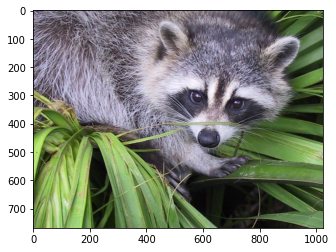

In [174]:
import scipy.misc
import matplotlib.pyplot as plt
face = scipy.misc.face()
plt.imshow(face)

---

*Exercer*

* connaître le nombre de pixels et de couleurs dans cette image
* assurez-vous que le rouge est le premier canal. Pour faire ça:
* faire une copie du visage
* dans la copie, mettre les deux derniers canaux de couleur à zéro
* afficher la copie
* convertir l&#39;image en BGR

Astuce : vous devrez faire bon usage de la notation des tranches. Essayez également d&#39;utiliser les points de suspension.

**Répondre:**


In [175]:
face.shape

(768, 1024, 3)

Donc 768x1024 pixels, 3 couleurs


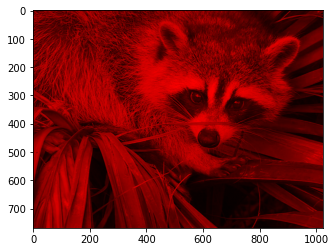

In [177]:
face_copy = np.copy(face)
face_copy[... ,1:] = 0
plt.imshow(face_copy)

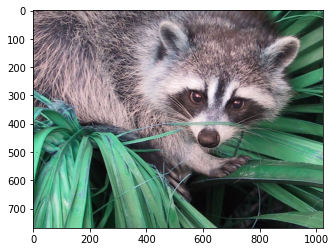

In [178]:
face_bgr = face[..., ::-1]
plt.imshow(face_bgr)

## Conclusion

Bien fait! vous êtes maintenant un utilisateur expérimenté de numpy !

Vos nouvelles compétences s&#39;avéreront utiles, même en dehors du domaine de l&#39;apprentissage automatique.

Juste un mot d&#39;avertissement pour l&#39;avenir : **Ne réinventez pas la roue**. Il est fort probable que ce dont vous aurez besoin ait déjà été implémenté par d&#39;autres utilisant numpy. N&#39;hésitez donc pas à jeter un œil aux packages python scientifiques existants avant de commencer à coder. Par example:

* [scikit-image](https://scikit-image.org/) fournit des outils de manipulation d&#39;images
* [opencv](https://pypi.org/project/opencv-python/) est une bibliothèque de vision par ordinateur à part entière, et est également fournie avec de nombreux outils.
* [scikit-learn](https://scikit-learn.org/stable/) propose des méthodes de manipulation de tableaux typiques en apprentissage automatique,
* [keras](https://keras.io/) fournit des outils de prétraitement si vous utilisez Keras+TensorFlow pour un apprentissage en profondeur
* PyTorch possède également de nombreuses fonctions de prétraitement, dans [torchvision](https://pytorch.org/docs/stable/torchvision/transforms.html), [torchaudio](https://pytorch.org/audio/), et [texte torche](https://pytorch.org/text/).
